In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_camph_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Camphene
0,0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.222222
1,1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0.222222
2,2,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.324705,...,1,0,0,0,0,0,1,0,0,0.222222
3,4,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.222222
4,5,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42971,0.0,0.00000,0.0,0.0,0.0,0.322452,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000
74996,42972,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000
74997,42973,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000
74998,42973,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Camphene', 'index'], axis = 1)
y = df_knn[['X..Camphene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.22222222],
       [0.22222222],
       [0.22222222],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

<AxesSubplot:ylabel='Count'>

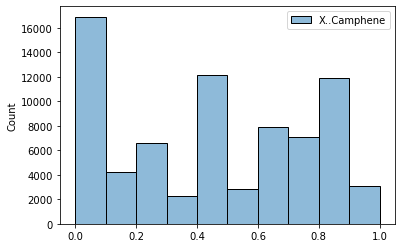

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.10932837425948536

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8148325243631908

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.6830040021141689

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([1.62780517e-03, 7.00787167e-04, 5.00933802e-04, 2.56028843e-04,
       1.38203885e-03, 1.29662350e-03, 2.85895010e-03, 5.36652181e-03,
       1.47443958e-04, 1.17508187e-03, 3.76666090e-04, 3.38153273e-03,
       3.26994091e-04, 2.07197772e-04, 1.29124442e-03, 1.32264949e-04,
       1.49540965e-03, 1.12008176e-03, 3.87691259e-04, 9.32107593e-04,
       1.72287107e-03, 1.03746416e-03, 7.76445197e-04, 9.80514245e-04,
       2.93589826e-04, 5.63377885e-04, 3.13460433e-03, 6.57284798e-04,
       5.33631951e-04, 1.33552307e-03, 5.35215521e-03, 4.34868808e-04,
       7.50112208e-04, 5.14336071e-04, 1.41718831e-03, 4.41881003e-04,
       1.23226829e-03, 4.55741131e-03, 2.98441262e-04, 2.63205559e-03,
       5.97979352e-04, 1.35210954e-03, 1.71275281e-04, 3.59947344e-03,
       3.87795371e-04, 7.24249503e-04, 2.10374853e-03, 2.95352616e-04,
       2.38915956e-03, 3.61472784e-04, 8.60363773e-04, 2.24736752e-04,
       8.36146826e-04, 9.50945798e-04, 9.48172526e-04, 2.76094294e-04,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_6,tfidf_7,tfidf_11,tfidf_26,tfidf_30,tfidf_37,tfidf_39,tfidf_43,tfidf_48,tfidf_73,...,grape,lemon,mango,mint,orange,skunk,spicy/herbal,strawberry,sweet,vanilla
0,0.0,0.0,0.000000,0.0,0.0,0.14162,0.189796,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
2,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.198545,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
3,0.0,0.0,0.165804,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.115840,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74996,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_6',
 'tfidf_7',
 'tfidf_11',
 'tfidf_26',
 'tfidf_30',
 'tfidf_37',
 'tfidf_39',
 'tfidf_43',
 'tfidf_48',
 'tfidf_73',
 'tfidf_78',
 'tfidf_79',
 'tfidf_90',
 'tfidf_93',
 'tfidf_98',
 'tfidf_109',
 'tfidf_111',
 'tfidf_119',
 'tfidf_121',
 'tfidf_128',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_151',
 'tfidf_158',
 'tfidf_162',
 'tfidf_167',
 'tfidf_168',
 'tfidf_196',
 'tfidf_199',
 'tfidf_200',
 'tfidf_205',
 'tfidf_207',
 'tfidf_210',
 'tfidf_230',
 'tfidf_236',
 'tfidf_239',
 'tfidf_240',
 'tfidf_245',
 'tfidf_246',
 'tfidf_253',
 'tfidf_258',
 'tfidf_263',
 'tfidf_272',
 'tfidf_273',
 'tfidf_281',
 'tfidf_285',
 'tfidf_291',
 'tfidf_304',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_317',
 'tfidf_319',
 'tfidf_325',
 'tfidf_329',
 'tfidf_337',
 'tfidf_340',
 'tfidf_342',
 'tfidf_345',
 'tfidf_349',
 'tfidf_357',
 'tfidf_360',
 'tfidf_362',
 'tfidf_366',
 'tfidf_367',
 'tfidf_373',
 'tfidf_374',
 'tfidf_381',
 'hybrid',
 'indica',
 'sativa',
 'cr

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_camph.pkl")
joblib.dump(selector, "selector_knn_tfidf_camph.pkl")

['selector_knn_tfidf_camph.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.10349416745805634

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.03221476514587819

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.17948472120455877

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8310076003338016

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.7106007807632101

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.04825805654867633

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.018364210083739594

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.13551461206725862

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9817788384584618

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8350263291981623

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_camph.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_camph.pkl")

['y_test_knreg_tfidf_camph.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.04603529692688159

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.8478990585168172

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.017141873615247466

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.13092697817962295

In [47]:
y_test

,X..Camphene
11591,0.888889
52020,0.000000
34666,0.222222
22169,0.555556
23049,0.000000
...,...
60863,0.777778
32316,1.000000
60933,0.777778
43206,0.250000


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

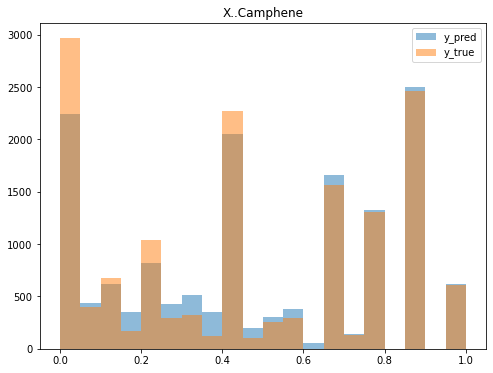

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Camphene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_camph.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.924
P-value: 0.000


<AxesSubplot:>

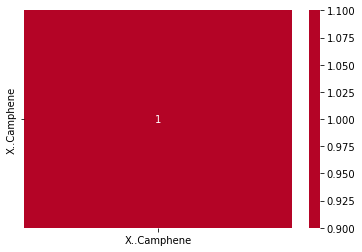

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)